In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
def abline(intercept, slope, color):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    x_vals, y_vals = x_vals.reshape(-1, 1),y_vals.reshape(-1, 1)
    plt.plot(x_vals, y_vals, '--', color=color)

# Simple linear regression
$y = a + bx$

We want to find an optimal set of values for $a$ and $b$ that minimize the residuals.

[9.9605549] [[2.00781607]]


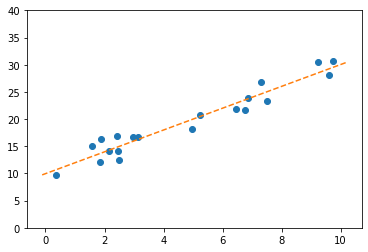

In [3]:
x = np.random.uniform(0, 10, 20)
y = 10 + x * 2 + np.random.randn(20) * 2
x, y = x.reshape(-1, 1), y.reshape(-1, 1)

lr = LinearRegression()
lr.fit(x, y)

print(lr.intercept_, lr.coef_)

plt.scatter(x, y)
abline(lr.intercept_, lr.coef_, 'tab:orange')
#abline(25, -1, 'tab:green')
plt.ylim((0, 40))

plt.show()

## Multiple linear regression and dummy variables
Each data point now has many values (dimensions), not just X.

We still want to predict a single Y by finding an optimal vector of coefficients.

In [4]:
n = 100
y = np.random.uniform(0, 1, n)
X = np.array([y *  2 + np.random.randn(n) * 0,
              y *  5 + np.random.randn(n) * 0,
              y * -3 + np.random.randn(n) * 0]).reshape(3, n).T
#y += 5 # Beware, if you uncomment that line, the cell below won't work.

lr = LinearRegression()
lr.fit(X, y)

print(lr.intercept_, lr.coef_)

-1.1102230246251565e-16 [ 0.05263158  0.13157895 -0.07894737]


In [5]:
X = np.array([np.array([np.random.choice([0, 1], p=[1 - y_i, y_i]) for y_i in y]),
              y *  5 + np.random.randn(n) * 0,
              y * -3 + np.random.randn(n) * 0]).reshape(3, n).T

X[:10]

array([[ 1.        ,  2.23324151, -1.33994491],
       [ 0.        ,  0.27551377, -0.16530826],
       [ 0.        ,  1.89837423, -1.13902454],
       [ 0.        ,  4.44888907, -2.66933344],
       [ 1.        ,  3.69334659, -2.21600795],
       [ 0.        ,  0.07736392, -0.04641835],
       [ 1.        ,  3.96234496, -2.37740698],
       [ 1.        ,  1.52706921, -0.91624152],
       [ 0.        ,  0.11602983, -0.0696179 ],
       [ 1.        ,  4.74125821, -2.84475493]])

In [6]:
cat = np.array([np.random.choice(['A', 'B', 'C']) for i in range(n)])
cat

array(['C', 'B', 'A', 'B', 'B', 'B', 'C', 'B', 'B', 'A', 'C', 'C', 'A',
       'A', 'C', 'C', 'B', 'A', 'B', 'A', 'A', 'C', 'C', 'A', 'B', 'A',
       'A', 'C', 'C', 'A', 'A', 'C', 'C', 'A', 'C', 'C', 'C', 'A', 'C',
       'B', 'A', 'B', 'C', 'B', 'A', 'A', 'C', 'A', 'B', 'A', 'C', 'C',
       'B', 'B', 'C', 'B', 'B', 'C', 'A', 'C', 'A', 'C', 'C', 'A', 'C',
       'C', 'B', 'C', 'C', 'A', 'A', 'B', 'C', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'C', 'A', 'B', 'C', 'A', 'C', 'C', 'C', 'A', 'A', 'B',
       'A', 'B', 'A', 'C', 'B', 'A', 'C', 'C', 'A'], dtype='<U1')

In [7]:
# Dummy variables (statistics).
# One-hot encoding (machine learning).

ohe = np.zeros((n, len(set(cat))))
for i, c in enumerate(sorted(set(cat))):
    ohe[cat == c, i] = 1

print(ohe[:10])

# Easier using Pandas.
print(pd.get_dummies(cat))

# We only really need n - 1 of those variables.
X = np.concatenate([X, ohe[:, 1:]], axis=1)
print(X[:10])

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]
    A  B  C
0   0  0  1
1   0  1  0
2   1  0  0
3   0  1  0
4   0  1  0
.. .. .. ..
95  0  1  0
96  1  0  0
97  0  0  1
98  0  0  1
99  1  0  0

[100 rows x 3 columns]
[[ 1.          2.23324151 -1.33994491  0.          1.        ]
 [ 0.          0.27551377 -0.16530826  1.          0.        ]
 [ 0.          1.89837423 -1.13902454  0.          0.        ]
 [ 0.          4.44888907 -2.66933344  1.          0.        ]
 [ 1.          3.69334659 -2.21600795  1.          0.        ]
 [ 0.          0.07736392 -0.04641835  1.          0.        ]
 [ 1.          3.96234496 -2.37740698  0.          1.        ]
 [ 1.          1.52706921 -0.91624152  1.          0.        ]
 [ 0.          0.11602983 -0.0696179   1.          0.        ]
 [ 1.          4.74125821 -2.84475493  0.          0.        ]]


# R<sup>2</sup>

$R^2 = \frac{\textrm{explained variability}}{\textrm{total variability}} = \frac{SSR}{SST}$

$R^2 = 1 - \frac{\textrm{unexplained variability}}{\textrm{total variability}} = 1 - \frac{SSE}{SST}$

$adjR^2 = 1 - \frac{SSE}{SST} \times \frac{n - 1}{n - k - 1} $

In [8]:
#R2 = lr.score(x, y) # From the first example.
R2 = 0.7

R = np.sqrt(R2)

def R2_adjust(r2, n, k):
    # Normalize for less degrees of freedom.
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))
    
adjR2 = R2_adjust(R2, 100, 10)

print(R2, R, adjR2)

0.7 0.8366600265340756 0.6662921348314607


# Mean Squared Error

$MSE = \frac{SSE}{n - k - 1}$

$\textrm{Standard Error} = RMSE = \sqrt{MSE}$

In [9]:
x = np.random.uniform(0, 10, 20)
y = 10 + x * 2 + np.random.randn(20) * 2
x, y = x.reshape(-1, 1), y.reshape(-1, 1)

lr = LinearRegression()
lr.fit(x, y)

rmse = np.sqrt(np.mean((lr.predict(x) - y)**2))
print(rmse)

mae = np.mean(abs(lr.predict(x) - y))
print(mae)

2.0320511616673476
1.638012650876842


# Finding the coefficients
## Closed form solution

$\vec{\beta}= (X^TX)^{-1}X^T\vec{y}$

## Extra: gradient descent

In [10]:
n = 20
x = np.random.uniform(0, 10, n)
y = 0 + x * 2 + np.random.randn(n) * 2
x, y = x.reshape(-1, 1), y.reshape(-1, 1)

coef = 0

def predict(x, coef):
    return x * coef

def mse(y_pred, y):
    return np.mean((y_pred - y)**2) / 2

y_pred = predict(x, coef)
#print(y_pred)

mse(y_pred, y)

77.37218307701305

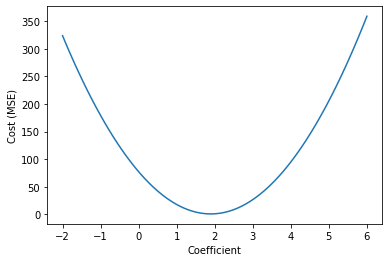

In [11]:
coefs = np.linspace(-2, 6, 100)

cost = []
for c in coefs:
    y_pred = predict(x, c)
    cost.append(mse(y_pred, y))

plt.plot(coefs, cost)
plt.xlabel('Coefficient')
plt.ylabel('Cost (MSE)')

plt.show()

In [12]:
def gradient(x, y, y_pred):
    return np.mean((y_pred - y) * x)

def update(grad, rate):
    return rate * grad

def fit(x, y, coef=0, n_iter=100, rate=0.01):
    for i in range(n_iter):
        #print(coef)
        y_pred = predict(x, coef)
        #print(mse(y_pred, y))
        grad = gradient(x, y, y_pred)
        #print(grad)
        coef -= update(grad, rate)
        
    return coef
        
fit(x, y)

1.8963847574305883

In [13]:
n = 20
x = np.random.uniform(0, 10, n)
y = -5 + x * 2 + np.random.randn(n) * 2
x, y = x.reshape(-1, 1), y.reshape(-1, 1)

x = np.concatenate([np.ones(n).reshape(-1, 1), x], axis=1)
x

array([[1.        , 5.71292954],
       [1.        , 8.83997988],
       [1.        , 1.06192078],
       [1.        , 0.52942744],
       [1.        , 6.56622682],
       [1.        , 6.74554316],
       [1.        , 4.3823186 ],
       [1.        , 0.37065016],
       [1.        , 2.28076335],
       [1.        , 1.70543785],
       [1.        , 3.5855631 ],
       [1.        , 7.07068634],
       [1.        , 4.24721758],
       [1.        , 0.38300713],
       [1.        , 0.57316942],
       [1.        , 3.01576829],
       [1.        , 5.3199555 ],
       [1.        , 3.81504906],
       [1.        , 6.27041488],
       [1.        , 7.62191771]])

In [14]:
def predict(x, coef):
    # Because 1*coef[0] + x[1]*coef[1] + ... +  x[n]*coef[n] is the dot product coef · x
    return np.dot(x, coef).reshape(-1, 1)

def gradient(x, y, y_pred):
    return np.mean((y_pred - y) * x, axis=0)

coef = fit(x, y, coef=np.zeros(2), n_iter=10000)
coef

array([-5.54383409,  2.20785051])

In [15]:
lr = LinearRegression().fit(x[:, 1:], y)
print(lr.intercept_, lr.coef_)

[-5.54383409] [[2.20785051]]


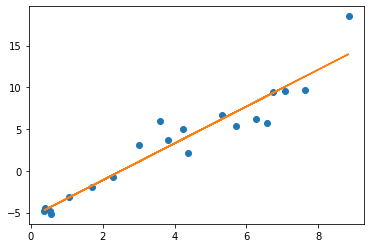

In [16]:
plt.scatter(x[:, 1], y)
plt.plot(x[:, 1], predict(x, coef), 'tab:orange')

plt.show()

# Homoscedasticity vs heteroscedasticity
OLS assumes data is homoscedastic.

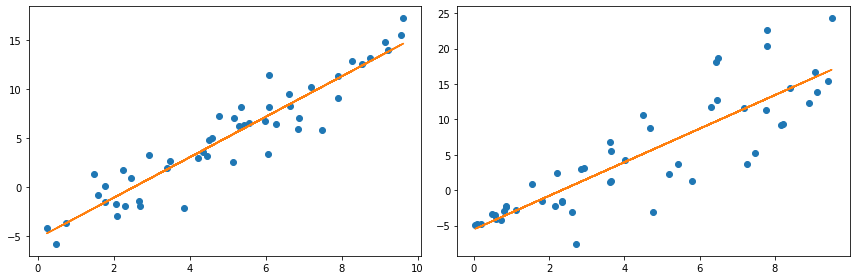

In [17]:
n = 50

x1 = np.random.uniform(0, 10, n)
y1 = -5 + x1 * 2 + np.random.randn(n) * 2
x1, y1 = x1.reshape(-1, 1), y1.reshape(-1, 1)

x2 = np.random.uniform(0, 10, n)
y2 = -5 + x2 * 2 + np.random.randn(n) * x2 # The residual depends on x!
x2, y2 = x2.reshape(-1, 1), y2.reshape(-1, 1)

lr1 = LinearRegression().fit(x1, y1)
lr2 = LinearRegression().fit(x2, y2)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].scatter(x1, y1)
ax[0].plot(x1, lr1.predict(x1), 'tab:orange')

ax[1].scatter(x2, y2)
ax[1].plot(x2, lr2.predict(x2), 'tab:orange')

plt.tight_layout()
plt.show()

[[ 1.         -0.01746947]
 [-0.01746947  1.        ]]
[[1.         0.46349027]
 [0.46349027 1.        ]]


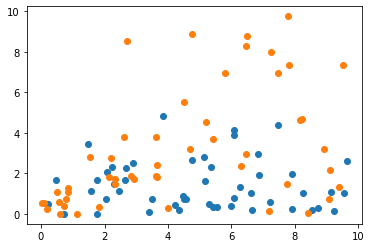

In [18]:
r1 = lr1.predict(x1) - y1
r2 = lr2.predict(x2) - y2

print(np.corrcoef(x1.reshape(-1), abs(r1).reshape(-1)))
print(np.corrcoef(x2.reshape(-1), abs(r2).reshape(-1)))

plt.scatter(x1, abs(r1))
plt.scatter(x2, abs(r2))

plt.show()

# Overfitting

Model fits train data well, but performs poorly on test data.

Occurs when the **sample size is too small** or the **feature space is too big**. It's actually the same thing!

### Fixes:

- Increase sample size.
- Decrease number of dimensions.
  - Discard irrelevant variables.
  - Dimensionality reduction.
- Regularization.
  

_Note: dimensions == features == variables_

# Regularization
Any stategy that constrains the search in the $\beta$ space.

The most common are L<sub>1</sub> and L<sub>2</sub> regularization.


#### L<sub>1</sub> or [LASSO](https://en.wikipedia.org/wiki/Lasso_(statistics)) (least absolute shrinkage and selection operator)

Puts a constraint on high values of $\beta$. Results in selecting few variables, leaving the rest close to 0 (a type of **feature selection**).

#### L<sub>2</sub> or [Tikhonov regularization](https://en.wikipedia.org/wiki/Tikhonov_regularization) or ridge regression

Puts a constraint on high values of $\beta^2$. Results in selecting low $\beta$s overall, avoiding one variable explaining most of the variability.

#### [Elastic net regularization](https://en.wikipedia.org/wiki/Elastic_net_regularization)

It's just $L_1 + L_2$ terms. A combination of the previous regularization terms.

### In practice: L<sub>1</sub> for feature selection, L<sub>2</sub> to reduce overfitting

In [19]:
# Modified cost function.
def l1(coefs, par=0.01):
    return par * np.mean(abs(coefs))

def l2(coefs, par=0.01):
    return par * np.mean(coefs**2) / 2

def mse(y_pred, coefs, y, par_l1=0.01, par_l2=0.01):
    return np.mean((y_pred - y)**2 / 2) + l1(coefs, par_l1) + l2(coefs, par_l2)

# Modified gradient function.
def grad_l1(coefs, par=0.01):
    return par * np.mean(np.sign(coefs), axis=0)

def grad_l2(coefs, par=0.01):
    return par * np.mean(coefs, axis=0)

def gradient(x, y, y_pred, par_l1=0.01, par_l2=0.01):
    return np.mean((y_pred - y) * x, axis=0) + grad_l1(coefs, par_l1) + grad_l2(coefs, par_l2)

In [20]:
from sklearn.linear_model import Lasso # L1
from sklearn.linear_model import Ridge # L2
from sklearn.linear_model import ElasticNet # L1 + L2